# Mask R-CNN - Inspect Shuriken Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.shuriken_gun import shuriken_gun

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
SHURIKEN_WEIGHTS_PATH = "//mask_rcnn_shuriken_gun.h5"  # TODO: update this path

c:\users\mmill\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

In [2]:
config = shuriken_gun.ShurikenConfig()
SHURIKEN_DIR = os.path.join(ROOT_DIR, "datasets/shuriken_gun")

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [6]:
# Load validation dataset
dataset = shuriken_gun.ShurikenDataset()
dataset.load_shuriken(SHURIKEN_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 29
Classes: ['BG', 'shuriken', 'gun']


## Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [8]:
# Set path to weights file

# Or, load the last model you trained
weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\mmill\Documents\GitHub\Education\MaskRCnn\logs\shuriken_gun20190306T2220\mask_rcnn_shuriken_gun_0030.h5
Re-starting from epoch 30


## Run Detection

Processing 1 images
image                    shape: (861, 861, 3)         min:    3.00000  max:  239.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
861


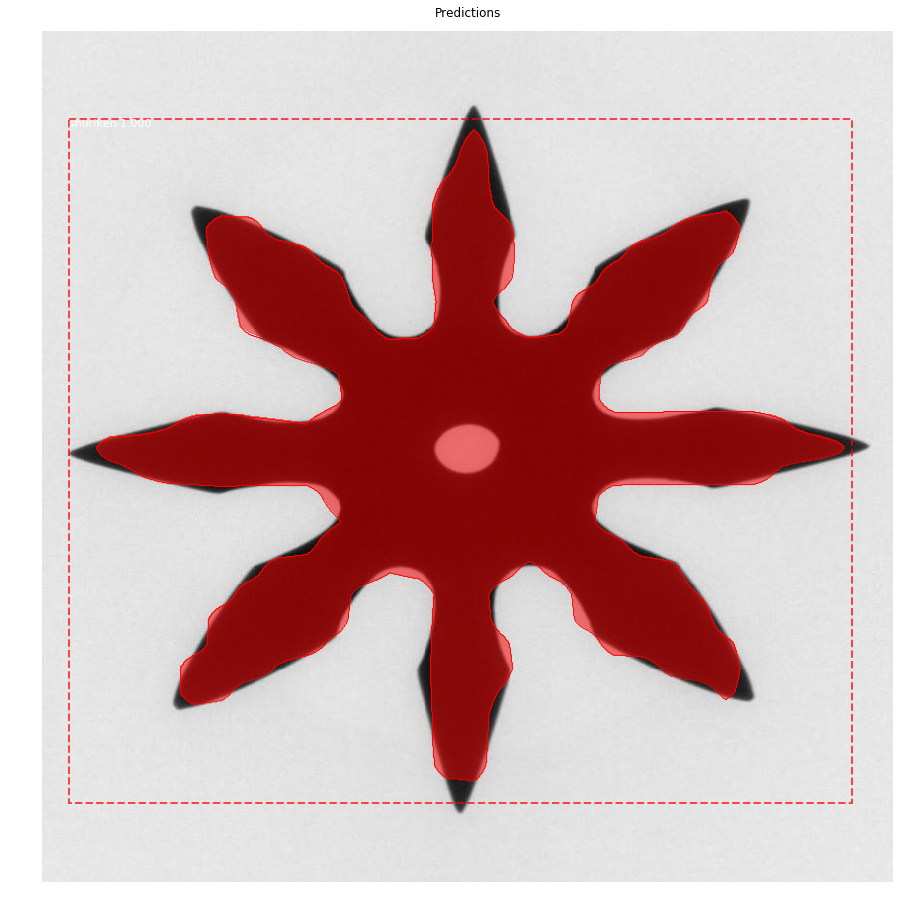

In [19]:
#image_id = random.choice(dataset.image_ids)
#image_id = 1
#image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
#info = dataset.image_info[image_id]
#print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

import cv2
#image = cv2.imread('./B0046_0041.png', cv2.IMREAD_COLOR)
image = cv2.imread('./B0050_0008.png', cv2.IMREAD_COLOR)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")


print(len(r['masks']))
#log("gt_class_id", gt_class_id)
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)

In [10]:
print(len(r['masks']))

718


In [11]:
print(len(r['masks'][0]))

1317


In [12]:
print(r['rois'])

[]


In [13]:
print(r['masks'][0][0])

[]


In [14]:
mask = r['masks']
x = len(r['masks'][0])
y = len(r['masks'])
print(x)
print(y)

1317
718


Processing 1 images
image                    shape: (2208, 2688, 3)       min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 2688.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Instance found
[[ 232  836  922 1614]]
[255. 255. 255.]


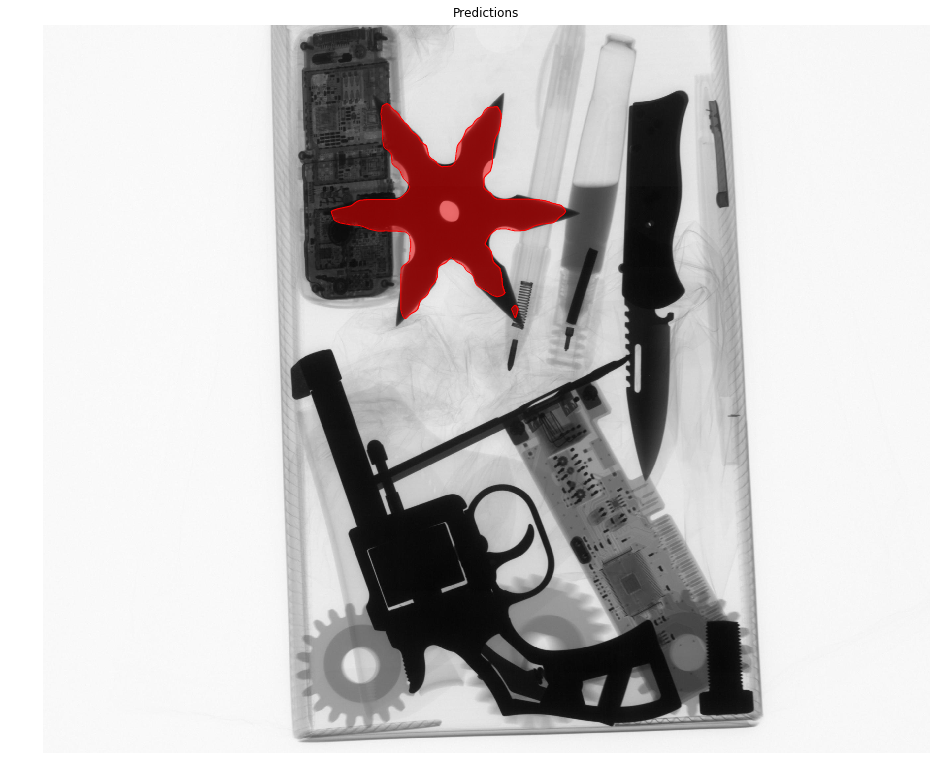

In [15]:

import cv2
#image = cv2.imread('./B0046_0041.png', cv2.IMREAD_COLOR)
#image_name = 'B0050_0008.png'
image_name = 'B0046_0036.png'
#image_name = 'flower.jpg'
image = cv2.imread('./' + image_name, cv2.IMREAD_COLOR)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]

instance_detected = False

N = r['rois'].shape[0]
if not N:
    print("No instance found")
    instance_detected = False
else:
    print("Instance found")
    instance_detected = True

if instance_detected == True:
    masked_image, contours, image_label = visualize.display_masks_only(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

y1, x1, y2, x2 = r['rois'][0]
print(r['rois'])
print(masked_image[x1,y1])


In [16]:
y1, x1, y2, x2 = r['rois'][0]



#(x1, y1), x2 - x1, y2 - y1
print(r['rois'])
print(masked_image[x1, y1])
print(masked_image.shape)

masked_image = masked_image[y1:y2, x1:x2]

cv2.imwrite('testMask.png', masked_image)

#x = len(masked_image)
#print(masked_image.shape)

[[ 232  836  922 1614]]
[255. 255. 255.]
(2208, 2688, 3)


True

In [17]:
print(image.shape)

(2208, 2688, 3)


In [18]:
mask_path = 'C:/Users/mmill/Documents/GitHub/Education/MaskRCnn/datasets/shuriken_gun/train/'

for mask_file in os.listdir(mask_path):
    if mask_file.endswith('.json'):
        annotation = json.load(open(mask_path + mask_file))
        file_name = list(annotation.keys())[0]
            
        info = annotation[file_name]
        file_attr = info['file_attributes']
        polygons = info['regions'][0]['shape_attributes']
        #print(mask_file)
        #image = cv2.imread(mask_path + file_name, cv2.IMREAD_COLOR)
            
        #if you get errors, swap widht and height because some of the annottions are wrong
        mask = np.zeros([file_attr["width"], file_attr["height"]], dtype=np.uint8) + 255
        #mask = np.zeros((height, width), dtype=np.uint8) + 255
        rr, cc = skimage.draw.polygon(polygons['all_points_y'], polygons['all_points_x'])
        mask[rr, cc] = 0
        mask = cv2.blur(mask, (4,4))
            
        #print(polygons['all_points_y'])
            
        max_y = int(round(max(polygons['all_points_y'])))
        min_y = int(round(min(polygons['all_points_y'])))
        max_x = int(round(max(polygons['all_points_x'])))
        min_x = int(round(min(polygons['all_points_x'])))
            #print(max_y)
            
        mask = mask[min_y:max_y, min_x:max_x]
            
        cv2.imwrite('./test_mask.png', mask)
        break
            
        #cv2.imwrite('./generated_masks/trimmed/' + file_name, mask)

NameError: name 'json' is not defined

In [ ]:
mask_only = masked_image.astype(np.uint8)
mask_only = cv2.blur(mask_only, (4,4))

#run mask against image classification
#if label matches then we find contours and save image/label data 

from skimage.measure import find_contours

gray_image = cv2.cvtColor(mask_only, cv2.COLOR_BGR2GRAY)

#contours = find_contours(gray_image, 0.5)
contour = contours[0]
x_values = contour[:,0]
y_values = contour[:,1]

width = image.shape[0]
height = image.shape[1]

x_values = np.array(x_values).tolist()
y_values = np.array(y_values).tolist()

#print(x_values)

print(image_label)

#print(r)

#test_mask = np.zeros([861, 861, 1], dtype=np.uint8) + 255
#rr, cc = skimage.draw.polygon(x_values, y_values)
#test_mask[rr, cc, 0] = 1

#either trainign or eval folder

#move logic here
import json

train_dir = SHURIKEN_DIR + '/train'
train_img_exists = False


for mask_file in os.listdir(train_dir):
    if mask_file == image_name:
        train_img_exists = True
        
if train_img_exists == True:
    #create annotation
    annotation = { image_name : { "filename" : image_name, "size" : 234, "regions" : [ { "shape_attributes" : { "name" : "polyline", "all_points_x" : x_values, "all_points_y" : y_values }, "region_attributes": {}}], "file_attributes": {"width": width, "height": height}, "label": image_label }}
    
    with open('annotation.json', 'w') as outfile:
        json.dump(annotation, outfile)
    #move image and annotation to training directory
    print("Moving " + image_name + " to training dir");
    cv2.imwrite('test.png', mask_only)
    cv2.imwrite('test_img.png', image)
else:
    print("Image " + image_name + " already exists in training dir")



In [ ]:
import numpy as np 
only_mask = np.zeros(shape=masked_image.shape)
print(only_mask.shape)

Training Mask generation

In [ ]:
import os
import json
import cv2
import numpy as np
import skimage.draw
def export_data_masks(directory):
    mask_path = 'C:/Users/mmill/Desktop/Contours/' + directory + '/'

    for mask_file in os.listdir(mask_path):
        if mask_file.endswith('.json'):
            annotation = json.load(open(mask_path + mask_file))
            file_name = list(annotation.keys())[0]
            
            info = annotation[file_name]
            file_attr = info['file_attributes']
            polygons = info['regions'][0]['shape_attributes']
            print(mask_file)
            #image = cv2.imread(mask_path + file_name, cv2.IMREAD_COLOR)
            
            #if you get errors, swap widht and height because some of the annottions are wrong
            mask = np.zeros([file_attr["width"], file_attr["height"]], dtype=np.uint8) + 255
            #mask = np.zeros((height, width), dtype=np.uint8) + 255
            rr, cc = skimage.draw.polygon(polygons['all_points_y'], polygons['all_points_x'])
            mask[rr, cc] = 0
            mask = cv2.blur(mask, (4,4))
            cv2.imwrite('./generated_masks/' + directory + '/' + file_name, mask)

#export_data_masks('train')
export_data_masks('gun')

In [1]:
#Label a mask
import os
import sys
import time
import numpy as np
import tensorflow as tf
new_dir = "../../MaskClassification/"

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)
from MaskClassification.scripts import label_image

file_name = "test.png"
model_file = new_dir + "tf_files/retrained_graph.pb"
label_file = new_dir + "tf_files/retrained_labels.txt"
input_height = 299
input_width = 299
input_mean = 0
input_std = 255
input_layer = "Mul"
output_layer = "final_result"

graph = label_image.load_graph(model_file)
t = label_image.read_tensor_from_image_file(file_name,
                                  input_height=input_height,
                                  input_width=input_width,
                                  input_mean=input_mean,
                                  input_std=input_std)

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name);
output_operation = graph.get_operation_by_name(output_name);

with tf.Session(graph=graph) as sess:
    start = time.time()
    results = sess.run(output_operation.outputs[0],
                      {input_operation.outputs[0]: t})
    end=time.time()
    results = np.squeeze(results)

    top_k = results.argsort()[-5:][::-1]
    labels = label_image.load_labels(label_file)

    print('\nEvaluation time (1-image): {:.3f}s\n'.format(end-start))
    template = "{} (score={:0.5f})"
    for i in top_k:
        print(template.format(labels[i], results[i]))


c:\users\mmill\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Evaluation time (1-image): 2.555s

shuriken (score=0.97530)
gun (score=0.02470)
